## Ten plik zawiera implementacje kilku algorytmów sortowania

Biblioteki

In [2]:
from random import random, randint
import numpy as np
from matplotlib import pyplot as plt
from timeit import default_timer
from math import log
from statistics import median

### Algorytmy sortowania

#### [Sortowanie przez wybieranie](https://en.wikipedia.org/wiki/Selection_sort)

Znajdź najmniejszy element na liście i zamień go miejscem z pierwszym elementem listy. Pomijając pierwszy element powtarzaj algorytm aż do pustej tablicy

In [3]:
def selectionSort(L):
    for i in range(len(L)):
        mini = i
        for j in range(i, len(L)):
            if L[j] < L[mini]:
                mini = j
        L[i], L[mini] = L[mini], L[i]

Ta procedura składa się z pętli, która wykonuje się $n$ razy dla listy `L` o długości $n$. W środku tej pętli wykonujemy kolejną pętlę, która wykonuje się kolejno $n,n - 1,n - 2\ldots$

Łącznie wykonujemy $\frac{n(n - 1)}{2}\approx\frac{1}{2}n^2$ iteracji wewnętrznej pętli. Stąd złożoność to $\Theta(n^2)$.

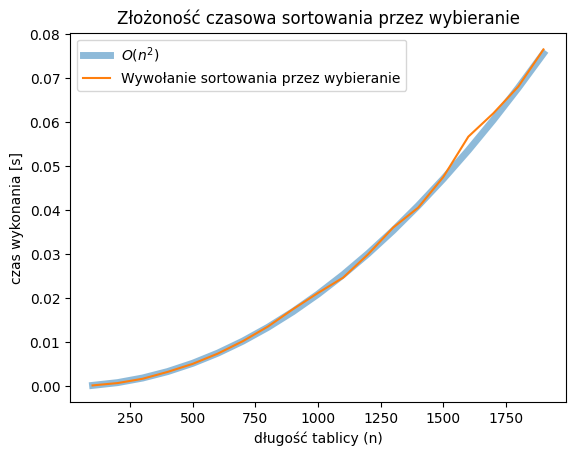

In [4]:
ns = range(100, 2000, 100)
ts = []
for N in ns:
    l = [random() for i in range(N)]
    start = default_timer()
    selectionSort(l)
    ts.append(default_timer() - start)

factor = median([ts[i] / ns[i] ** 2 for i in range(len(ns))])

plt.plot(ns, [factor * n * n for n in ns], label = r"$O(n^2)$", linewidth=5, alpha=0.5)
plt.plot(ns, ts, label = "Wywołanie sortowania przez wybieranie")
plt.xlabel("długość tablicy (n)")
plt.ylabel("czas wykonania [s]")
plt.title("Złożoność czasowa sortowania przez wybieranie")
plt.legend();

W przypadku posortowanej tablicy na wejściu, wciąż będziemy wykonywali tyle samo operacji.

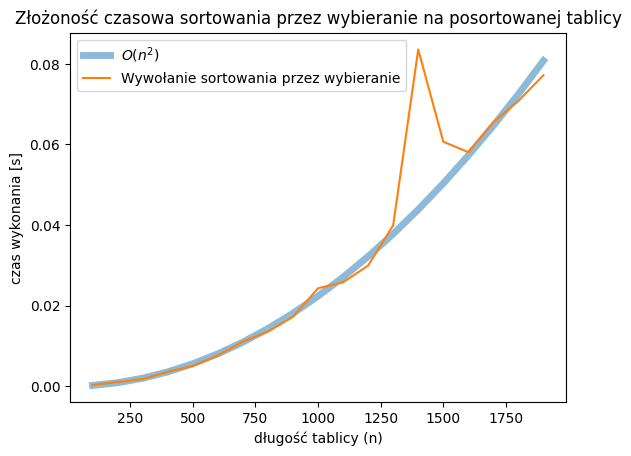

In [5]:
ns = range(100, 2000, 100)
ts = []
for N in ns:
    l = [random() for i in range(N)]
    l.sort()
    start = default_timer()
    selectionSort(l)
    ts.append(default_timer() - start)

factor = median([ts[i] / ns[i] ** 2 for i in range(len(ns))])

plt.plot(ns, [factor * n * n for n in ns], label = r"$O(n^2)$", linewidth=5, alpha=0.5)
plt.plot(ns, ts, label = "Wywołanie sortowania przez wybieranie")
plt.xlabel("długość tablicy (n)")
plt.ylabel("czas wykonania [s]")
plt.title("Złożoność czasowa sortowania przez wybieranie na posortowanej tablicy")
plt.legend();

Żeby przetestować procedurę, wykonajmy ją na kilku losowych tablicach i sprawdźmy, czy wynik jest posortowany.

In [6]:
ns = range(100, 2000, 100)
for n in ns:
    l = [random() for i in range(n)]
    selectionSort(l)
    assert all([a < b for (a, b) in zip(l, l[1:])])

#### [Sortowanie przez wstawianie](https://en.wikipedia.org/wiki/Insertion_sort)

Jednoelementowa tablica jest zawsze posortowana. Weź pierwszy element tablicy jako początkową posortowaną tablicę. Idąc po każdym kolejnym elemencie, przesuwaj go wstecz aż element znajdzie się na swoim miejscu.

In [7]:
def insertionSort(L):
    for i in range(1, len(L)):
        key = L[i]
        j = i
        while j > 0 and L[j - 1] > key:
            L[j] = L[j - 1]
            j -= 1
        L[j] = key

Ta procedura składa się z pętli, która wykonuje się $n - 1$ razy dla listy `L` o długości $n$. W środku tej pętli wykonujemy kolejną pętlę, która wykonuje się odpowiednio nie więcej razy niż $1,2,3\ldots n - 1$. W najlepszym przypadku procedura wykona za każdym razem wewnętrzną pętlę tylko raz.

Łącznie maksymalnie wykonujemy $\frac{(n - 1)(n - 2)}{2}\approx\frac{1}{2}n^2$ iteracji wewnętrznej pętli. Stąd złożoność to $O(n^2)$. Minimalnie wykonujemy $n - 1$ iteracji wewnętrznej pętli. Stąd najlepszy przypadek będzie $\sim n$.

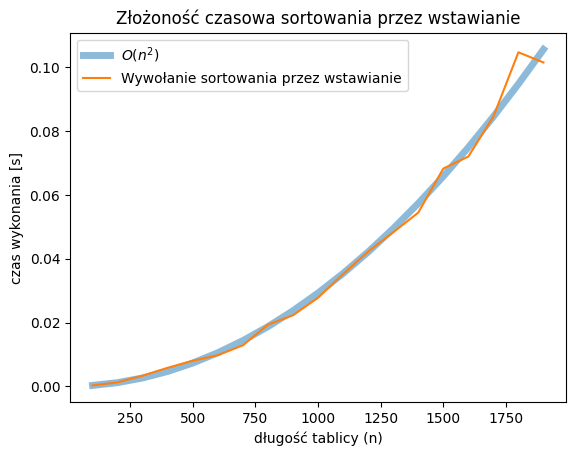

In [8]:
ns = range(100, 2000, 100)
ts = []
for N in ns:
    l = [random() for i in range(N)]
    start = default_timer()
    insertionSort(l)
    ts.append(default_timer() - start)

factor = median([ts[i] / ns[i] ** 2 for i in range(len(ns))])

plt.plot(ns, [factor * n * n for n in ns], label = r"$O(n^2)$", linewidth=5, alpha=0.5)
plt.plot(ns, ts, label = "Wywołanie sortowania przez wstawianie")
plt.xlabel("długość tablicy (n)")
plt.ylabel("czas wykonania [s]")
plt.title("Złożoność czasowa sortowania przez wstawianie")
plt.legend();

Gdy tablica jest już posortowana, nasza procedura będzie o wiele szybsza.

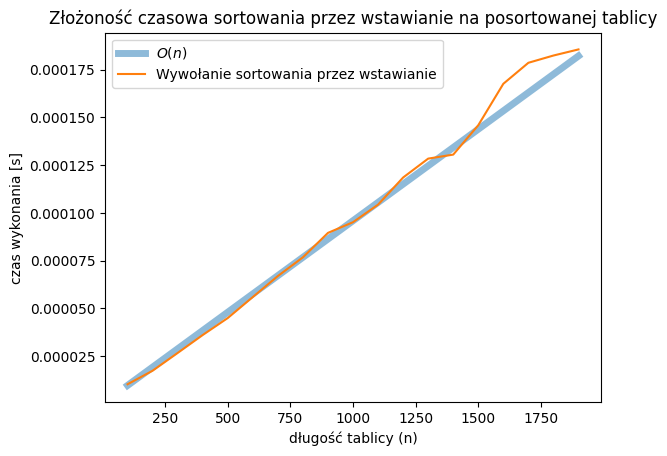

In [9]:
ns = range(100, 2000, 100)
ts = []
for N in ns:
    l = [random() for i in range(N)]
    l.sort()
    start = default_timer()
    insertionSort(l)
    ts.append(default_timer() - start)

factor = median([ts[i] / ns[i] for i in range(len(ns))])

plt.plot(ns, [factor * n for n in ns], label = r"$O(n)$", linewidth=5, alpha=0.5)
plt.plot(ns, ts, label = "Wywołanie sortowania przez wstawianie")
plt.xlabel("długość tablicy (n)")
plt.ylabel("czas wykonania [s]")
plt.title("Złożoność czasowa sortowania przez wstawianie na posortowanej tablicy")
plt.legend();

Żeby przetestować procedurę, wykonajmy ją na kilku losowych tablicach i sprawdźmy, czy wynik jest posortowany.

In [10]:
ns = range(100, 2000, 100)
for n in ns:
    l = [random() for i in range(n)]
    insertionSort(l)
    assert all([a < b for (a, b) in zip(l, l[1:])])

#### [Sortowanie bąbelkowe](https://en.wikipedia.org/wiki/Bubble_sort)

Porównaj pierwszą parę elementów i sprawdź, czy są w dobrej kolejności. Jeśli nie, zamień je miejscami. Przejdź o jeden element dalej i powtarzaj aż do końca. Zapamiętaj, gdzie dokonałeś zamiany po raz ostatni i powtórzy całą procedurę do tego momentu.

In [11]:
def bubbleSort(L):
    last = len(L) - 1
    while last > 0:
        k = last
        last = 0
        for i in range(k):
            if L[i] > L[i + 1]:
                L[i], L[i + 1] = L[i + 1], L[i]
                last = i

Ta procedura składa się z pętli, która wykonuje się  maksymalnie $n - 1$ razy dla listy `L` o długości $n$. Pierwsza iteracja wewnętrznej pętli wykonuje się $n - 1$ razy. Kolejne wykonania powtarzają się nie więcej niż $n - 2,n - 3, n - 4\ldots$ razy. W najlepszym wypadku nie będzie rzadnych wykonań po pierwszym przejściu.

Łącznie maksymalnie wykonujemy $\frac{(n - 1)(n - 2)}{2}\approx\frac{1}{2}n^2$ iteracji wewnętrznej pętli. Stąd złożoność to $O(n^2)$. Minimalnie wykonujemy $n - 1$ iteracji wewnętrznej pętli. Stąd najlepszy przypadek będzie $\sim n$.

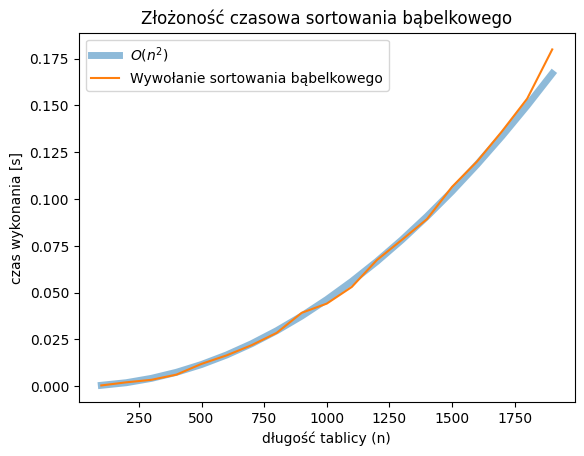

In [12]:
ns = range(100, 2000, 100)
ts = []
for N in ns:
    l = [random() for i in range(N)]
    start = default_timer()
    bubbleSort(l)
    ts.append(default_timer() - start)

factor = median([ts[i] / ns[i] ** 2 for i in range(len(ns))])

plt.plot(ns, [factor * n * n for n in ns], label = r"$O(n^2)$", linewidth=5, alpha=0.5)
plt.plot(ns, ts, label = "Wywołanie sortowania bąbelkowego")
plt.xlabel("długość tablicy (n)")
plt.ylabel("czas wykonania [s]")
plt.title("Złożoność czasowa sortowania bąbelkowego")
plt.legend();

Gdy tablica jest już posortowana, nasza procedura będzie o wiele szybsza.

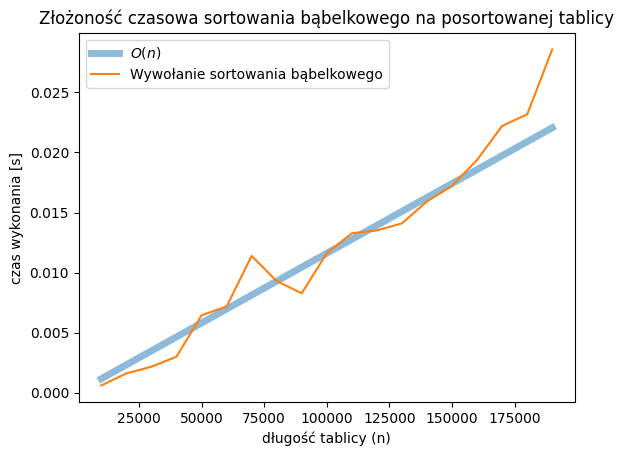

In [13]:
ns = range(10000, 200000, 10000)
ts = []
for N in ns:
    l = [random() for i in range(N)]
    l.sort()
    start = default_timer()
    bubbleSort(l)
    ts.append(default_timer() - start)

factor = median([ts[i] / ns[i] for i in range(len(ns))])

plt.plot(ns, [factor * n for n in ns], label = r"$O(n)$", linewidth=5, alpha=0.5)
plt.plot(ns, ts, label = "Wywołanie sortowania bąbelkowego")
plt.xlabel("długość tablicy (n)")
plt.ylabel("czas wykonania [s]")
plt.title("Złożoność czasowa sortowania bąbelkowego na posortowanej tablicy")
plt.legend();

Żeby przetestować procedurę, wykonajmy ją na kilku losowych tablicach i sprawdźmy, czy wynik jest posortowany.

In [14]:
ns = range(100, 2000, 100)
for n in ns:
    l = [random() for i in range(n)]
    bubbleSort(l)
    assert all([a < b for (a, b) in zip(l, l[1:])])

#### [Sortowanie przez złączanie](https://en.wikipedia.org/wiki/Merge_sort)

Podziel tablicę długości $n$ na $n$ tablic jednoelementowych. Takie tablice są posortowane. Złączaj tablice parami w większe posortowane tablice. Żeby połączyć dwie posortowane tablice w jedną posortowaną tablicę porównuj początki tych tablic i przerzucaj mniejszy z nich do nowej tablicy.

In [15]:
def merge(A, B):
    C = []
    i, j = 0, 0
    while i < len(A) and j < len(B):
        if A[i] <= B[j]:
            C.append(A[i])
            i += 1
        else:
            C.append(B[j])
            j += 1
    return C + A[i:] + B[j:]

def mergeSort(L):
    Ls = [[e] for e in L]
    while len(Ls) > 1:
        Ls2 = []
        for i in range(1, len(Ls), 2):
            Ls2.append(merge(Ls[i - 1], Ls[i]))
        if len(Ls) % 2 == 1:
            Ls2.append(Ls[-1])
        Ls = Ls2
    return Ls[0]

Procedura `merge` wykonuje jedną operację (albo porównanie, dołączenie i zwiększenie indeksu, albo samo dołączenie) na element, stąd złożoność to $O(n)$. Wykonanie operacji `merge` na wszystkich podtablicach wykonuje tyle operacji, ile łącznie jest elementów. Elementów jest $n$ dla tablicy długości $n$.

Procedura `mergeSort` za każdym powtórzeniem zewnętrznej pętli wykonuje $O(n)$ operacji łącznie na wszystkich podtablicach. Pętla powtarza się dla ilości tablic odpowiednio $n, \frac{n}{2}, \frac{n}{4} \ldots 2$ lub $2^k, 2^{k - 1} \ldots 2^1$, dla $k$ będącego ilością powtórzeń pętli. Stąd $n = 2^k$ lub $k = \text{log}_2 n$. Łącznie daje to nam złożoność $\text{log}_2 n \cdot O(n) = O(n\;\text{log}\,n)$.

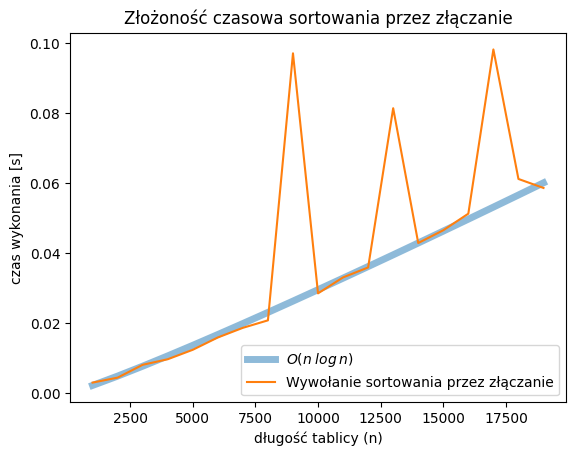

In [16]:
ns = range(1000, 20000, 1000)
ts = []
for N in ns:
    l = [random() for i in range(N)]
    start = default_timer()
    mergeSort(l)
    ts.append(default_timer() - start)

factor = median([ts[i] / (ns[i] * log(ns[i])) for i in range(len(ns))])

plt.plot(ns, [factor * n * log(n) for n in ns], label = r"$O(n\;log\,n)$", linewidth=5, alpha=0.5)
plt.plot(ns, ts, label = "Wywołanie sortowania przez złączanie")
plt.xlabel("długość tablicy (n)")
plt.ylabel("czas wykonania [s]")
plt.title("Złożoność czasowa sortowania przez złączanie")
plt.legend();

Żeby przetestować procedurę, wykonajmy ją na kilku losowych tablicach i sprawdźmy, czy wynik jest posortowany.

In [17]:
ns = range(100, 2000, 100)
for n in ns:
    l = [random() for i in range(n)]
    l = mergeSort(l)
    assert all([a < b for (a, b) in zip(l, l[1:])])

#### [Sortowanie szybkie](https://en.wikipedia.org/wiki/Quicksort)

Wybierz pewien element z tablicy i podziel tablicę na elementy mniejsze, równe i większe od wybranego. Posortuj w ten sam sposób mniejsze i większe elementy. Jeżeli tablica ma tylko jeden element zwróć ją, jest już posorotowana.

In [18]:
def quickSort(L):
    if len(L) < 2:
        return L
    p = L[0]
    lesser, equal, greater = [], [], []
    for e in L:
        if e < p:
            lesser.append(e)
        elif e == p:
            equal.append(e)
        else:
            greater.append(e)
    return quickSort(lesser) + equal + quickSort(greater)

Jeśli tablica składa się z tylko jednej wartości powtórzonej wiele razy, wszystkie elementy lądują w tablicy `equal` a `lesser` i `greater` będą puste i zostaną od razu zwrócone. Cała procedura wykona wyłącznie $n$ operacji. Jeżeli za każdym razem będziemy wybierali najmniejszy (analogicznie największy) element do podziału, trafi on do `equal`, wszystkie pozostałe trafią do `greater` (/`lesser`) a `lesser` (/`greater`) pozostanie pusta. Sortowanie będzie wykonywało odpowiednio $n, n - 1, n - 2\ldots$ operacji, łącznie $\frac{n(n - 1)}{2} = O(n^2)$. Zazwyczaj elementy będą równo podzielone pomiędzy `lesser` i `greater` skutkując złożonością $O(n\;\text{log}\,n)$ (dowód w segmencie `mergeSort`).

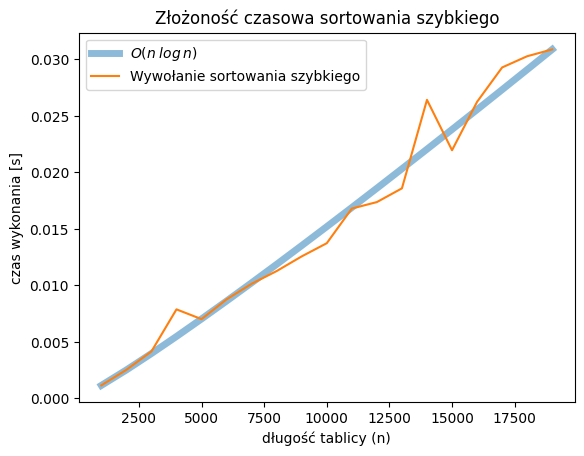

In [19]:
ns = range(1000, 20000, 1000)
ts = []
for N in ns:
    l = [random() for i in range(N)]
    start = default_timer()
    quickSort(l)
    ts.append(default_timer() - start)

factor = median([ts[i] / (ns[i] * log(ns[i])) for i in range(len(ns))])

plt.plot(ns, [factor * n * log(n) for n in ns], label = r"$O(n\;log\,n)$", linewidth=5, alpha=0.5)
plt.plot(ns, ts, label = "Wywołanie sortowania szybkiego")
plt.xlabel("długość tablicy (n)")
plt.ylabel("czas wykonania [s]")
plt.title("Złożoność czasowa sortowania szybkiego")
plt.legend();

Gdy tablica składa się z tych samych elementów, nasza procedura będzie o wiele szybsza.

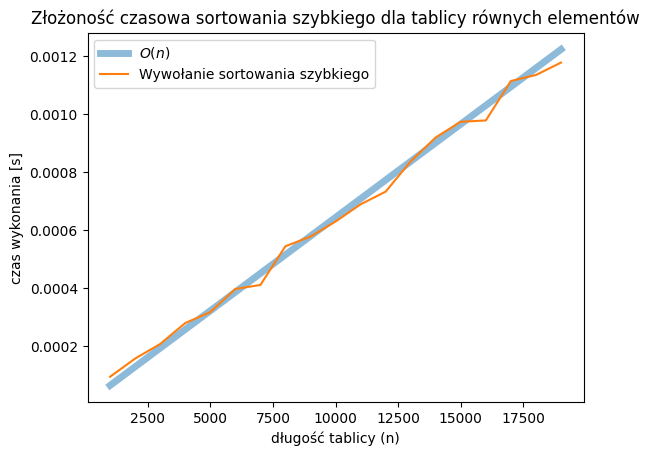

In [20]:
ns = range(1000, 20000, 1000)
ts = []
for N in ns:
    l = [0 for i in range(N)]
    start = default_timer()
    quickSort(l)
    ts.append(default_timer() - start)

factor = median([ts[i] / ns[i] for i in range(len(ns))])

plt.plot(ns, [factor * n for n in ns], label = r"$O(n)$", linewidth=5, alpha=0.5)
plt.plot(ns, ts, label = "Wywołanie sortowania szybkiego")
plt.xlabel("długość tablicy (n)")
plt.ylabel("czas wykonania [s]")
plt.title("Złożoność czasowa sortowania szybkiego dla tablicy równych elementów")
plt.legend();

Gdy tablica jest już posortowana, nasza procedura będzie o wiele wolniejsza.

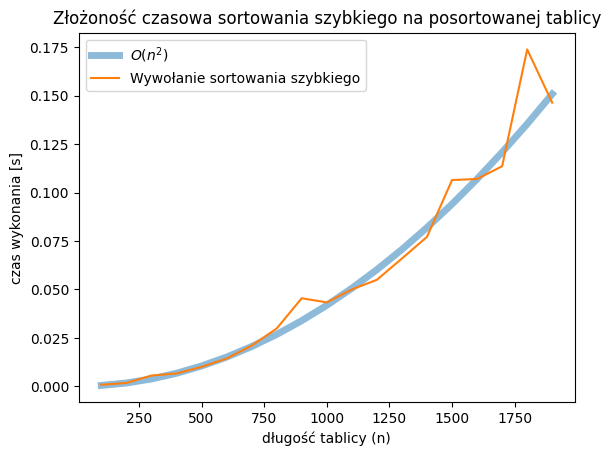

In [21]:
ns = range(100, 2000, 100)
ts = []
for N in ns:
    l = [random() for i in range(N)]
    l.sort()
    start = default_timer()
    quickSort(l)
    ts.append(default_timer() - start)

factor = median([ts[i] / (ns[i] ** 2) for i in range(len(ns))])

plt.plot(ns, [factor * n * n for n in ns], label = r"$O(n^2)$", linewidth=5, alpha=0.5)
plt.plot(ns, ts, label = "Wywołanie sortowania szybkiego")
plt.xlabel("długość tablicy (n)")
plt.ylabel("czas wykonania [s]")
plt.title("Złożoność czasowa sortowania szybkiego na posortowanej tablicy")
plt.legend();

Żeby przetestować procedurę, wykonajmy ją na kilku losowych tablicach i sprawdźmy, czy wynik jest posortowany.

In [22]:
ns = range(100, 2000, 100)
for n in ns:
    l = [random() for i in range(n)]
    l = quickSort(l)
    assert all([a < b for (a, b) in zip(l, l[1:])])

#### [Sortowanie przez zliczanie](https://en.wikipedia.org/wiki/Counting_sort)

Utwórz liczniki dla każdej możliwej wartości, zlicz ile razy każda wartość występuje, wyznacz, gdzie w posortowanej tablicy zaczną pojawiać się konkretne wartości, wstawiaj elementy w odpowiednie miejsca.

In [23]:
def countingSort(L, lowest, highest):
    counters = [0 for i in range(lowest, highest + 1)]
    locations = [0 for e in counters]
    Lcopy = list(L)
    for e in L:
        counters[e] += 1
    for i in range(highest - lowest):
        locations[i + 1] = locations[i] + counters[i]
    for e in Lcopy:
        L[locations[e]] = e
        locations[e] += 1

Tworzenie tablic `counters` i `locations` oraz wykonanie drugiej pętli zajmują $O(k)$, gdzie $k$ jest różnicą między `highest` i `lowest`. Tworzenie kopii tablicy `L` oraz pozostałe dwie pętle wykonują się dla każdego elementu, stąd $O(n)$. Łączna złożoność to $O(n + k)$, będzie to $O(n)$, gdy $n > k$ i $O(k)$ w przeciwnym przypadku.

Przetestujmy algorytm dla $n \gg k$ i zmiennego $n$.

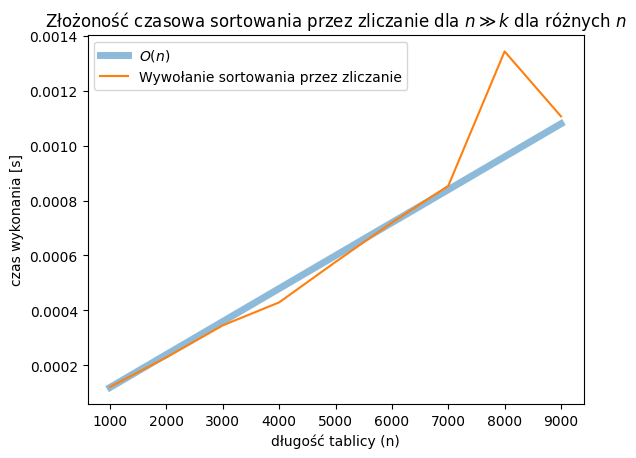

In [24]:
ns = range(1000, 10000, 1000)
k = 10
ts = []
for N in ns:
    l = [randint(0,k) for i in range(N)]
    l.sort()
    start = default_timer()
    countingSort(l, 0, k)
    ts.append(default_timer() - start)

factor = median([ts[i] / (ns[i]) for i in range(len(ns))])

plt.plot(ns, [factor * n for n in ns], label = r"$O(n)$", linewidth=5, alpha=0.5)
plt.plot(ns, ts, label = "Wywołanie sortowania przez zliczanie")
plt.xlabel("długość tablicy (n)")
plt.ylabel("czas wykonania [s]")
plt.title(r"Złożoność czasowa sortowania przez zliczanie dla $n\gg k$ dla różnych $n$")
plt.legend();

Przetestujmy algorytm dla $n \gg k$ i zmiennego $k$.

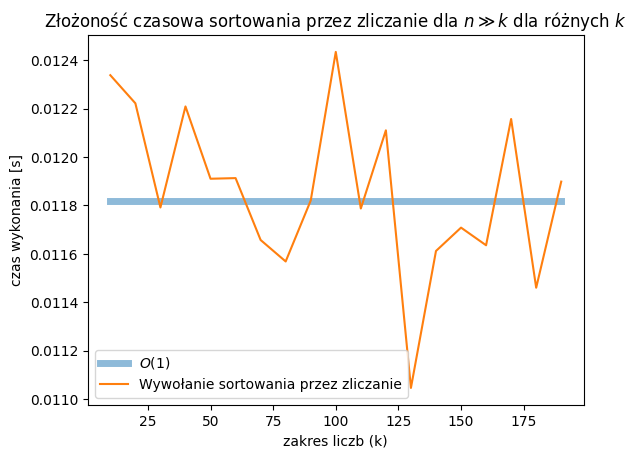

In [25]:
N = 100000
ks = range(10, 200, 10)
ts = []
for k in ks:
    l = [randint(0,k) for i in range(N)]
    l.sort()
    start = default_timer()
    countingSort(l, 0, k)
    ts.append(default_timer() - start)

factor = median([ts[i] for i in range(len(ks))])

plt.plot(ks, [factor for n in ks], label = r"$O(1)$", linewidth=5, alpha=0.5)
plt.plot(ks, ts, label = "Wywołanie sortowania przez zliczanie")
plt.xlabel("zakres liczb (k)")
plt.ylabel("czas wykonania [s]")
plt.title(r"Złożoność czasowa sortowania przez zliczanie dla $n\gg k$ dla różnych $k$")
plt.legend();